In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import tensorflow as tf

In [70]:
# Set Eager API
print("Setting Eager mode...")
tf.enable_eager_execution()
tfe = tf.contrib.eager

Setting Eager mode...

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [61]:
mean=20
mean_of_oblique=np.sqrt((mean*mean) / 2)

# var=0.05
# var_of_oblique=var/np.sqrt(2)

mean1, cov1 = [0,mean], np.array([
    [0.7,0.0],
    [0.0,7.0]
])

mean2, cov2 = [mean_of_oblique,mean_of_oblique], np.array([
    [5.0,4.0],
    [4.0,5.0]
])

mean3, cov3 = [mean,0], np.array([
    [7.0,0.0],
    [0.0,0.7]
])

mean4, cov4 = [mean_of_oblique,-mean_of_oblique], np.array([
    [5.0,-4.0],
    [-4.0,5.0]
])

mean5, cov5 = [0,-mean], np.array([
    [0.7,0.0],
    [0.0,7.0]
])

mean6, cov6 = [-mean_of_oblique,-mean_of_oblique], np.array([
    [5.0,4.0],
    [4.0,5.0]
])

mean7, cov7 = [-mean,0], np.array([
    [7.0,0.0],
    [0.0,0.7]
])

mean8, cov8 = [-mean_of_oblique,mean_of_oblique], np.array([
    [5.0,-4.0],
    [-4.0,5.0]
])
norm_params = []
norm_params.append(multivariate_normal(mean1, cov1))
norm_params.append(multivariate_normal(mean2, cov2))
norm_params.append(multivariate_normal(mean3, cov3))
norm_params.append(multivariate_normal(mean4, cov4))
norm_params.append(multivariate_normal(mean5, cov5))
norm_params.append(multivariate_normal(mean6, cov6))
norm_params.append(multivariate_normal(mean7, cov7))
norm_params.append(multivariate_normal(mean8, cov8))



In [62]:
def plot_normal(mean, cov):
    x, y = np.random.multivariate_normal(mean, cov, 5000).T
    plt.plot(x, y, 'x')
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')
    #plt.axes().set_aspect('equal', 'datalim')
    plt.show()

In [63]:
def get_sample(params):
    s = np.random.multivariate_normal(params.mean, params.cov, 1)[0].T
    return s

In [64]:
def generate_samples_from_gmm(norm_params, weights, N):
    mixture_idx = np.random.choice(len(weights), size=N, replace=True, p=weights)
    samples = [norm_params[i].rvs(size=1) for i in mixture_idx]
    return np.array(samples)

In [65]:
class NormParams():
    
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov

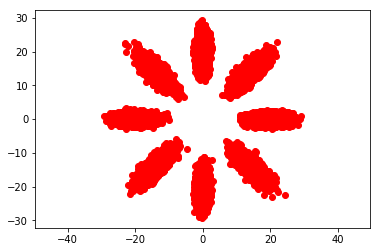

In [66]:
n = 40000
weights = np.ones(8, dtype=np.float64) / 8.0
samples = generate_samples_from_gmm(norm_params, weights, n)
plt.plot(samples[:,0], samples[:,1], 'ro')
plt.axis('equal')
plt.show()

In [60]:
my_params = []
my_params.append(NormParams(mean1, cov1))
my_params.append(NormParams(mean2, cov2))
my_params.append(NormParams(mean3, cov3))
my_params.append(NormParams(mean4, cov4))
my_params.append(NormParams(mean5, cov5))
my_params.append(NormParams(mean6, cov6))
my_params.append(NormParams(mean7, cov7))
my_params.append(NormParams(mean8, cov8))

In [51]:
def generate_samples_from_gmm_2(norm_params, weights, N):
    mixture_idx = np.random.choice(len(weights), size=N, replace=True, p=weights)
    samples = [get_sample(norm_params[i]) for i in mixture_idx]
    return np.array(samples)

In [52]:
n = 40000
weights = np.ones(8, dtype=np.float64) / 8.0
samples = generate_samples_from_gmm_2(my_params, weights, n)

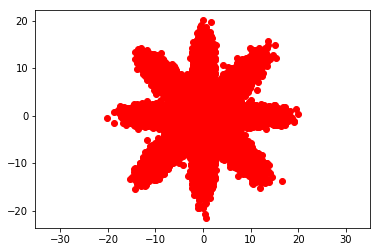

In [53]:
plt.plot(samples[:,0], samples[:,1], 'ro')
plt.axis('equal')
plt.show()

In [466]:
mean=10.0
mean_of_oblique=np.sqrt((mean*mean) / 2)

# var=0.05
# var_of_oblique=var/np.sqrt(2)

mean1, cov1 = [0,mean], [0.7,7.0]

mean2, cov2 = [mean_of_oblique,mean_of_oblique], np.array([
    [5.0,4.0],
    [4.0,5.0]
])

mean3, cov3 = [mean,0], [7.0,0.7]

mean4, cov4 = [mean_of_oblique,-mean_of_oblique], np.array([
    [5.0,-4.0],
    [-4.0,5.0]
])

mean5, cov5 = [0,-mean], [0.7,7.0]

mean6, cov6 = [-mean_of_oblique,-mean_of_oblique], np.array([
    [5.0,4.0],
    [4.0,5.0]
])

mean7, cov7 = [-mean,0], [7.0,0.7]

mean8, cov8 = [-mean_of_oblique,mean_of_oblique], np.array([
    [5.0,-4.0],
    [-4.0,5.0]
])

In [467]:
np.array([mean_of_oblique,mean_of_oblique], dtype="float32")

array([7.071068, 7.071068], dtype=float32)

In [468]:
class NormDistDiag():
    
    def __init__(self, mean, stdev, beta):
        self.mean = mean
        self.stdev = stdev
        self.beta = beta
        self.tf_mean, self.tf_stdev = tf.constant(self.mean), tf.constant(self.stdev)
        self.tf_dist = tf.contrib.distributions.MultivariateNormalDiag(loc=self.tf_mean, scale_diag=self.tf_stdev)
        self.dim = len(mean)
        
    def tf_dist(self):
        return self.tf_dist

    def prob(self, z):
        return self.tf_dist.prob(z)
        
    def stdev_inv(self):
        return tf.diag(tf.ones(self.dim)/self.stdev)
        
    def grad_component(self, z):
        return self.beta * tf.reshape(self.prob(z), (-1, 1)) * tf.matmul((z - self.tf_mean), self.stdev_inv())
    

In [469]:
class NormDist():
    
    def __init__(self, mean, stdev, beta):
        self.mean = mean
        self.stdev = stdev
        self.beta = beta
        self.tf_mean, self.tf_stdev = tf.constant(self.mean), tf.constant(self.stdev)
        self.tf_dist = tf.contrib.distributions.MultivariateNormalFullCovariance(loc=self.tf_mean, covariance_matrix=self.tf_stdev)
        self.dim = len(mean)
        
    def tf_dist(self):
        return self.tf_dist

    def prob(self, z):
        return tf.cast(self.tf_dist.prob(tf.cast(z, tf.float64)), tf.float32)
        
    def stdev_inv(self):
        return tf.diag(tf.ones(self.dim)/self.stdev)
        
    def grad_component(self, z):
        return self.beta * tf.reshape(self.prob(z), (-1, 1)) * tf.matmul((z - self.tf_mean), self.stdev_inv())

In [465]:
dist1 = NormDistDiag(mean1, cov1, 0.5)
dist3 = NormDistDiag(mean3, cov3, 0.5)
dist5 = NormDistDiag(mean5, cov5, 0.5)
dist7 = NormDistDiag(mean7, cov7, 0.5)
dist2 = NormDist(mean2, cov2, 0.5)
dist4 = NormDist(mean4, cov4, 0.5)
dist6 = NormDist(mean6, cov6, 0.5)
dist8 = NormDist(mean8, cov8, 0.5)

In [454]:
#@tf.custom_gradient
def penalty_term_with_gd(z, dists):
    probs = tf.stack([dist.prob(z) for dist in dists])
    betas = tf.constant([dist.beta for dist in dists], shape=(len(dists),1))
    denom = tf.reduce_sum(betas * probs, axis=0)
    denom = tf.reshape(denom, (-1, 1))
    y=-tf.reduce_sum(tf.log(1e-30 + denom))
        
    def grad(dz): 
        print(dz)
        grad_components = tf.stack([dist.grad_component(z) for dist in dists])
        num=tf.reduce_sum(grad_components, axis=[0])
        
        gradient = num/denom
        return dz * gradient
    return y,grad

In [455]:
dists_odd = [dist1, dist3, dist5, dist7]
dists_even = [dist2, dist4, dist6, dist8]
dists = [dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8]

In [456]:
tf.log(1e-30)

<tf.Tensor: id=55308, shape=(), dtype=float32, numpy=-69.07755>

In [457]:
# z = tf.constant([[1., 4.],
#                  [3.,1.],
#                  [2.,3.],
#                  [0.5,0.5],
#                  [0.2,2.1]
#                 ],name='z')
#z = tf.constant([[1., 4.]],name='z')
z = tf.constant([mean1,
                 mean2,
                 mean3,
                 mean4,
                 mean5,
                 mean6,
                 mean7,
                 mean8],name='z')

In [458]:
penalty_term_with_gd(z, dists_odd)

(<tf.Tensor: id=55773, shape=(), dtype=float32, numpy=234.33714>,
 <function __main__.penalty_term_with_gd.<locals>.grad(dz)>)

In [459]:
penalty_term_with_gd(z, dists_even)

(<tf.Tensor: id=56229, shape=(), dtype=float32, numpy=128.17087>,
 <function __main__.penalty_term_with_gd.<locals>.grad(dz)>)

In [460]:
penalty_term_with_gd(z, dists)

(<tf.Tensor: id=56665, shape=(), dtype=float32, numpy=30.932629>,
 <function __main__.penalty_term_with_gd.<locals>.grad(dz)>)

In [387]:
probs = tf.stack([dist.prob(z) for dist in dists])
probs_odd = tf.stack([dist.prob(z) for dist in dists_odd])
probs_even = tf.stack([dist.prob(z) for dist in dists_even])

In [388]:
betas = tf.constant([dist.beta for dist in dists], shape=(len(dists),1))
betas_odd = tf.constant([dist.beta for dist in dists_odd], shape=(len(dists_odd),1))
betas_even = tf.constant([dist.beta for dist in dists_even], shape=(len(dists_even),1))

In [389]:
betas_probs = betas * probs
betas_probs_odd = betas_odd * probs_odd
betas_probs_even = betas_even * probs_even


In [390]:
betas_probs

<tf.Tensor: id=43150, shape=(8, 2), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00],
       [2.6520591e-02, 2.6520591e-02],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00],
       [8.6028515e-41, 8.6028515e-41],
       [0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [356]:
betas_probs_odd

<tf.Tensor: id=38731, shape=(4, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [357]:
betas_probs_even

<tf.Tensor: id=38732, shape=(4, 2), dtype=float32, numpy=
array([[2.6520591e-02, 2.6520591e-02],
       [0.0000000e+00, 0.0000000e+00],
       [8.6028515e-41, 8.6028515e-41],
       [0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [358]:
denom = tf.reduce_sum(betas_probs, axis=0)
denom_odd = tf.reduce_sum(betas_probs_odd, axis=0)
denom_even = tf.reduce_sum(betas_probs_even, axis=0)

In [359]:
denom

<tf.Tensor: id=38737, shape=(2,), dtype=float32, numpy=array([0.02652059, 0.02652059], dtype=float32)>

In [360]:
denom_odd

<tf.Tensor: id=38739, shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [361]:
denom_even

<tf.Tensor: id=38741, shape=(2,), dtype=float32, numpy=array([0.02652059, 0.02652059], dtype=float32)>

In [362]:
denom = tf.reshape(denom, (-1, 1))
denom

<tf.Tensor: id=38746, shape=(2, 1), dtype=float32, numpy=
array([[0.02652059],
       [0.02652059]], dtype=float32)>

In [363]:
tf.log(denom)

<tf.Tensor: id=38748, shape=(2, 1), dtype=float32, numpy=
array([[-3.629834],
       [-3.629834]], dtype=float32)>

In [364]:
tf.log(denom_odd)

<tf.Tensor: id=38750, shape=(2,), dtype=float32, numpy=array([-inf, -inf], dtype=float32)>

In [338]:
tf.log(denom_even)

<tf.Tensor: id=36693, shape=(2,), dtype=float32, numpy=array([-3.629834, -3.629834], dtype=float32)>

In [335]:
-tf.reduce_sum(tf.log(denom))

<tf.Tensor: id=36686, shape=(), dtype=float32, numpy=7.259668>

In [475]:

rho = 0.8
sigma_x = np.sqrt(5.0)
sigma_y = np.sqrt(5.0)
mean_x = mean_of_oblique
mean_y = mean_of_oblique

In [503]:
x = np.linspace(start=-10,stop=10, num=100) #[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [1045]:
def dist_rotated(mean, theta):
    print(mean)
    init_cov = np.array([
        [7.0,0.0],
        [0.0,0.7]
    ], dtype="float64")
    
    u = np.array([
        [np.cos(theta),-np.sin(theta)],
        [np.sin(theta),np.cos(theta)]
    ])
    cov_rotated = np.matmul(np.matmul(u,init_cov),u.T)
    dist = NormDist(mean, cov_rotated, 0.5)
    return dist

def generate_distributions(n, r=10, cx=0,cy=0):
    distributions = []

    for i in range(n):
        #angle = ((360/n) * i) * (np.pi/180)
        angle = (2*i*np.pi)/n
        mean_1 = cx + r * np.cos(angle)
        mean_2 = cx + r * np.sin(angle)
        
        dist = dist_rotated([mean_1, mean_2], angle)
        distributions.append(dist)
            
    return distributions

[<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=() event_shape=(2,) dtype=float64>,
 <tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=() event_shape=(2,) dtype=float64>]

<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=() event_shape=(2,) dtype=float64>

In [868]:
dists = generate_distributions(10, r=20)

[20.0, 0.0]
[16.18033988749895, 11.755705045849464]
[6.180339887498949, 19.02113032590307]
[-6.180339887498947, 19.021130325903073]
[-16.180339887498945, 11.755705045849465]
[-20.0, 2.4492935982947065e-15]
[-16.18033988749895, -11.75570504584946]
[-6.180339887498951, -19.02113032590307]
[6.180339887498945, -19.021130325903073]
[16.180339887498945, -11.755705045849465]


In [ ]:
np.c_[np.random.multivariate_normal(mean1, cov2, 1000), np.ones(1000)]

In [995]:
samples = [np.c_[np.random.multivariate_normal(dist.mean, dist.stdev, 1000), i*np.ones(1000)] for i, dist in enumerate(dists)]
#samples

In [996]:
samples = np.array(samples).reshape((-1,3))
#samples

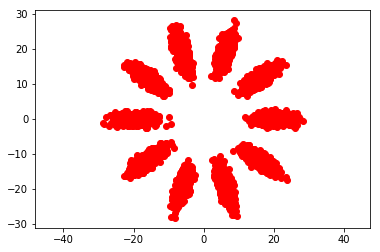

In [872]:

#samples.shape
plt.plot(samples[:,0], samples[:,1], 'ro')
plt.axis('equal')
plt.show()

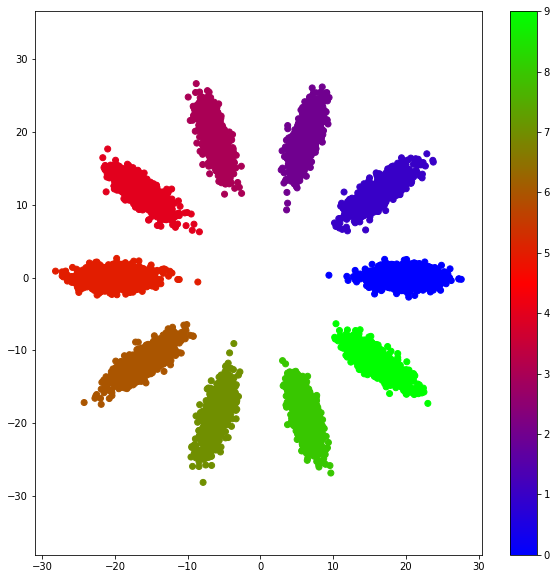

In [888]:
plt.figure(figsize=(10,10))
plt.scatter(samples[:,0], samples[:,1], c=samples[:,2], cmap='brg')
plt.colorbar()
plt.axis('equal')

plt.show()

In [ ]:
def generate_samples(self, n):
    
    return np.array(samples).reshape((-1,2))
    
def generate_and_plot(self, n):
    samples = self.generate_samples(n)
    plt.plot(samples[:,0], samples[:,1], 'ro')
    plt.axis('equal')
    plt.show()

In [803]:
coordinates = generate_coordinates(n=10)
coordinates

array([[ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 8.09016994e+00,  5.87785252e+00,  8.09016994e-01,
         5.87785252e-01],
       [ 3.09016994e+00,  9.51056516e+00,  3.09016994e-01,
         9.51056516e-01],
       [-3.09016994e+00,  9.51056516e+00, -3.09016994e-01,
         9.51056516e-01],
       [-8.09016994e+00,  5.87785252e+00, -8.09016994e-01,
         5.87785252e-01],
       [-1.00000000e+01,  1.22464680e-15, -1.00000000e+00,
         1.22464680e-16],
       [-8.09016994e+00, -5.87785252e+00, -8.09016994e-01,
        -5.87785252e-01],
       [-3.09016994e+00, -9.51056516e+00, -3.09016994e-01,
        -9.51056516e-01],
       [ 3.09016994e+00, -9.51056516e+00,  3.09016994e-01,
        -9.51056516e-01],
       [ 8.09016994e+00, -5.87785252e+00,  8.09016994e-01,
        -5.87785252e-01]])

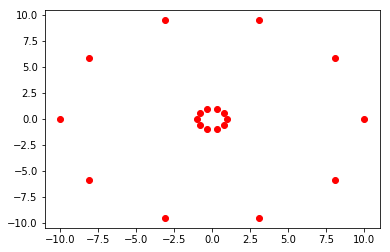

In [804]:
to_plot = coordinates.reshape((-1,2))
plt.plot(to_plot[:,0], to_plot[:,1], 'ro')

In [805]:
# def gen_params(x_a, y_a, x_b, y_b):
#     f=10
#     rho=0.9
    
#     mu_x = x_a
#     mu_y = y_b
#     sigma_x = x_a - x_b
#     sigma_y = y_a - y_b

#     mean, cov = np.array([mu_x,mu_y],dtype="float64"), np.array([
#         [np.square(sigma_x)/f, (rho*sigma_x*sigma_y)/f],
#         [(rho*sigma_x*sigma_y)/f, np.square(sigma_y)/f]
#     ], dtype="float64")
#     return mean, cov

In [790]:
def gen_params(x,y):
    f=10
    a = x+0.1
    b = y+0.1
    mean, cov = np.array([x,y],dtype="float64"), np.array([
        [np.square(a)/f, (a*b * 0.8)/f],
        [(a*b * 0.8)/f, np.square(b)/f]
    ], dtype="float64")
    return mean, cov

In [811]:
m,c = gen_params(10,0,1,0)
c
#NormDist(m, c, 0.5)

array([[8.1, 0. ],
       [0. , 0. ]])

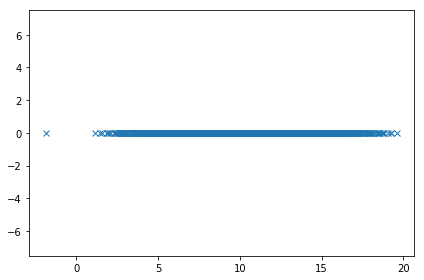

In [809]:
m,c = gen_params(10,0,1,0)
plot_normal(m,c)

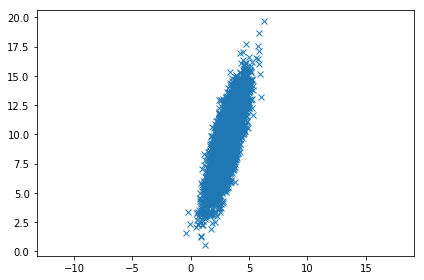

In [664]:
m,c = gen_params(3.09016994,9.51056516)
plot_normal(m,c)

In [1183]:
class MixtureOfNormalsOnCircle():
    
    def __init__(self, n, init_cov, r=10):
        self.n = n
        self.r = r
        self.init_cov = init_cov
        self.dists = self.__generate_distributions(n)
        self.betas = tf.constant([dist.beta for dist in self.dists], shape=(len(self.dists),1))
        
    def __dist_rotated(self, mean, theta):
        
        u = np.array([
            [np.cos(theta),-np.sin(theta)],
            [np.sin(theta),np.cos(theta)]
        ], dtype="float64")
        cov_rotated = np.matmul(np.matmul(u,self.init_cov),u.T)
        dist = NormDist(mean, cov_rotated, 0.5)
        return dist

    def __generate_distributions(self, n, cx=0,cy=0):
        distributions = []

        for i in range(n):
            #angle = ((360/n) * i) * (np.pi/180)
            angle = (2*i*np.pi)/n
            mean_1 = cx + self.r * np.cos(angle)
            mean_2 = cx + self.r * np.sin(angle)

            dist = self.__dist_rotated(np.array([mean_1, mean_2], dtype="float64"), angle)
            distributions.append(dist)

        return distributions
    
    def generate_samples(self, n):
        #samples = [np.random.multivariate_normal(dist.mean, dist.stdev, n) for dist in self.dists]
        samples = [np.c_[np.random.multivariate_normal(dist.mean, dist.stdev, n), i*np.ones(n)] for i, dist in enumerate(self.dists)]

        return np.array(samples).reshape((-1,3))
    
    def generate_and_plot(self, n):
        samples = self.generate_samples(n)
        plt.scatter(samples[:,0], samples[:,1], c=samples[:,2], cmap='brg')
        plt.colorbar()
        #plt.plot(samples[:,0], samples[:,1], 'ro')
        plt.axis('equal')
        plt.show()
        
    def penalty_term_with_gd(self, z):
        probs = tf.stack([dist.prob(z) for dist in self.dists])
        
        denom = tf.reduce_sum(self.betas * probs, axis=0)
        denom = tf.reshape(denom, (-1, 1))
        y=-tf.reduce_sum(tf.log(1e-30 + denom))

        def grad(dz): 
            grad_components = tf.stack([dist.grad_component(z) for dist in dists])
            num=tf.reduce_sum(grad_components, axis=[0])

            gradient = num/denom
            return dz * gradient
        return y,grad
    
    def get_tf_dists(self):
        return [dist.tf_dist for dist in self.dists]
    
    def get_dists(self):
        return self.dists
    
    def responsibilities(self, z):
        probs = tf.stack([dist.prob(z) for dist in self.dists])
        
        denom = tf.reduce_sum(self.betas * probs, axis=0)
        #denom = tf.reshape(denom, (-1, 1))
        return (probs/denom)*self.betas
        

In [1184]:
init_cov = np.array([
        [0.07,0.0],
        [0.0,0.007]
    ], dtype="float64")

mix = MixtureOfNormalsOnCircle(10, init_cov, r=1)

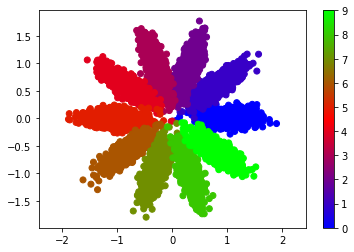

In [1185]:
mix.generate_and_plot(1000)

In [1031]:
dists = mix.get_dists()

In [1032]:
# z = tf.constant([mean1],name='z')
z = tf.constant([mean1,
                 mean2,
                 mean3,
                 mean4,
                 mean5,
                 mean6,
                 mean7,
                 mean8],name='z')
z.shape

TensorShape([Dimension(8), Dimension(2)])

In [1033]:
probs = tf.stack([dist.prob(z) for dist in dists])
probs     

<tf.Tensor: id=120075, shape=(10, 8), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 1.3451047e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.2522131e-14, 0.0000000e+00],
       [0.0000000e+00, 2.9600586e-04, 3.1940749e-39, 0.0000000e+00,
        0.0000000e+00, 1.6430648e-16, 0.0000000e+00, 0.0000000e+00],
       [5.6684843e-12, 5.1770299e-24, 0.0000000e+00, 0.0000000e+00,
        8.9611585e-24, 4.5509602e-35, 0.0000000e+00, 0.0000000e+00],
       [5.6684843e-12, 0.0000000e+00, 0.0000000e+00, 4.5509602e-35,
        8.9611585e-24, 0.0000000e+00, 0.0000000e+00, 5.1770299e-24],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6430648e-16,
        0.0000000e+00, 0.0000000e+00, 3.1940749e-39, 2.9600586e-04],
       [0.0000000e+00, 0.0000000e+00, 5.2522131e-14, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.3451047e-01, 0.0000000e+00],
       [0.0000000e+00, 1.6430648e-16, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.9600586e-04, 3.1940749e-3

In [1034]:
denom = tf.reduce_sum(betas * probs, axis=0)
#denom = tf.reshape(denom, (-1, 1))
denom

<tf.Tensor: id=120080, shape=(8,), dtype=float32, numpy=
array([5.6684843e-12, 1.4800293e-04, 6.7255236e-02, 1.4800293e-04,
       5.6684843e-12, 1.4800293e-04, 6.7255236e-02, 1.4800293e-04],
      dtype=float32)>

In [1035]:
resp = probs/denom*betas
tf.transpose(resp)

<tf.Tensor: id=120086, shape=(8, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 5.0000000e-01, 5.0000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.9043689e-13,
        7.9043689e-13, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.7489619e-20, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.5507850e-13, 1.5374561e-31,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.3745919e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.9046872e-13, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.3745919e-38],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5374561e-31,
        5.5507850e-13, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.7489619e-20, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.9043689e-13, 7.9043689e-13,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0000000e-01,
        5.0000000e-01, 0.0000000e+00],
       [0.0000000e+00, 5.5507850e-13, 1.5374561e-31, 0.0000000e+0

In [1036]:
tf.reduce_sum(resp, axis=0)

<tf.Tensor: id=120089, shape=(8,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [1037]:
mix.responsibilities(z)

<tf.Tensor: id=120976, shape=(10, 8), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.9046872e-13, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.3745919e-38, 0.0000000e+00,
        0.0000000e+00, 5.5507850e-13, 0.0000000e+00, 0.0000000e+00],
       [5.0000000e-01, 1.7489619e-20, 0.0000000e+00, 0.0000000e+00,
        7.9043689e-13, 1.5374561e-31, 0.0000000e+00, 0.0000000e+00],
       [5.0000000e-01, 0.0000000e+00, 0.0000000e+00, 1.5374561e-31,
        7.9043689e-13, 0.0000000e+00, 0.0000000e+00, 1.7489619e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.5507850e-13,
        0.0000000e+00, 0.0000000e+00, 2.3745919e-38, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.9046872e-13, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.5507850e-13, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 2.3745919e-3

In [943]:
tf_dists = mix.get_tf_dists()

In [947]:
z

<tf.Tensor: id=55310, shape=(8, 2), dtype=float32, numpy=
array([[  0.      ,  10.      ],
       [  7.071068,   7.071068],
       [ 10.      ,   0.      ],
       [  7.071068,  -7.071068],
       [  0.      , -10.      ],
       [ -7.071068,  -7.071068],
       [-10.      ,   0.      ],
       [ -7.071068,   7.071068]], dtype=float32)>

In [948]:
probs = tf.stack([tf.cast(dist.prob(tf.cast(z, tf.float64)), tf.float32) for dist in tf_dists])

In [954]:
betas = (0.5 * np.ones(10)).reshape((10,1))
betas

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [960]:
mix.penalty_term_with_gd(z)

(<tf.Tensor: id=90661, shape=(), dtype=float32, numpy=92.46384>,
 <function __main__.MixtureOfNormalsOnCircle.penalty_term_with_gd.<locals>.grad(dz)>)

In [1146]:
def dists_from_angles(thetas, init_cov):
    
    def dist_from_angle(theta, init_cov):
        mean_1 = cx + r * tf.math.cos(theta)
        mean_2 = cx + r * tf.math.sin(theta)
        mean = np.array([mean_1, mean_2], dtype="float64")
        u = np.array([
            [tf.math.cos(theta),-tf.math.sin(theta)],
            [tf.math.sin(theta),tf.math.cos(theta)]
        ], dtype="float64") 

        cov_rotated = tf.matmul(tf.matmul(u,init_cov),tf.transpose(u))
        tf_mean, tf_stdev = tf.constant(mean), tf.constant(cov_rotated)
        tf_dist = tf.contrib.distributions.MultivariateNormalFullCovariance(loc=tf_mean, covariance_matrix=tf_stdev)
        return tf_dist   

    dists = [dist_from_angle(theta, init_cov) for theta in thetas]
    return dists

[<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=() event_shape=(2,) dtype=float64>,
 <tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=() event_shape=(2,) dtype=float64>]

In [1151]:
def penalty_term_with_gd_only_tf(z, angles, init_cov):
    tf_dists = dists_from_angles(angles, init_cov)
    probs = tf.stack([tf.cast(dist.prob(tf.cast(z, tf.float64)), tf.float32) for dist in tf_dists])
    denom = tf.reduce_sum(betas * probs, axis=0)
    denom = tf.reshape(denom, (-1, 1))

    y=-tf.reduce_sum(tf.log(1e-30 + denom))

    return y

In [ ]:
init_cov = np.array([
    [7.0,0.0],
    [0.0,0.7]
], dtype="float64")

In [1173]:
thetas = tf.constant([(2*i*np.pi)/10 for i in range(10)])
penalty_term_with_gd_only_tf(z,thetas,init_cov)

<tf.Tensor: id=141908, shape=(), dtype=float32, numpy=80.445816>

In [ ]:
init_cov = np.array([
    [7.0,0.0],
    [0.0,0.7]
], dtype="float64")
#dist_from_angle(2*np.pi, init_cov)
dists_from_angles([np.pi, 2*np.pi], init_cov)